In [27]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from seaborn import boxplot
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor 
#from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.svm import SVR 
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.linear_model import LinearRegression

In [29]:
data=pd.read_csv('Data/Iowa1.csv')
data.head()

,year,yday,dayl (s),prcp (mm/day),srad (W/m^2),swe (kg/m^2),tmax (deg c),tmin (deg c),vp (Pa),Soil type,...,Sand Content %,Clay Content %,Silt Content %,soil bulk density (grams per cubic centimeter),wilting point %,field capacity %,saturation point (cm),Yield (27.6gN/m2),Yield (11.6gN/m2),Yield (40.1gN/m2)
0,1982,1,32486.40039,4,185.600006,24,-7.5,-22.0,120,Ely silty clay loam,...,5,28.3,66.7,1.33,17.7,31.5,122,0.0,0,0.0
1,1982,2,32486.40039,9,176.000000,32,-1.0,-14.0,200,Ely silty clay loam,...,5,28.3,66.7,1.33,17.7,31.5,122,0.0,0,0.0
2,1982,3,32486.40039,10,169.600006,40,-2.0,-14.0,200,Ely silty clay loam,...,5,28.3,66.7,1.33,17.7,31.5,122,0.0,0,0.0
3,1982,4,32486.40039,9,124.800003,52,-7.0,-14.5,200,Ely silty clay loam,...,5,28.3,66.7,1.33,17.7,31.5,122,0.0,0,0.0
4,1982,5,32486.40039,0,252.800003,52,-2.0,-16.5,160,Ely silty clay loam,...,5,28.3,66.7,1.33,17.7,31.5,122,0.0,0,0.0


In [31]:
#Data drop for US data
data = data.drop('year',axis=1)
data = data.drop('Soil type',axis=1)
data = data.drop('swe (kg/m^2)',axis=1)
data = data.drop('Soil pH',axis=1)
data = data.drop('Yield (40.1gN/m2)',axis=1)
data = data.drop('Yield (11.6gN/m2)',axis=1)
data = data.drop(' soil bulk density (grams per cubic centimeter)',axis=1)
data = data.drop(' wilting point %',axis=1)
data = data.drop('field capacity %',axis=1)
data = data.drop('saturation point (cm)',axis=1)
data = data.drop('Soil Organic matter %',axis=1)
data = data.drop('Sand Content %',axis=1)
data = data.drop('Clay Content %',axis=1)
data = data.drop('Silt Content %',axis=1)

#Data drop for X.O data
#data = data.drop('Soil_pH',axis=1)
#data = data.drop('Date/Time',axis=1)
#data = data.drop('Yield (6gN/m2)',axis=1)
#data = data.drop('Yield (27.6gN/m2)',axis=1)
#data = data.drop('Yield (40.1gN/m2)',axis=1)
#data = data.drop('Sand Content %',axis=1)
#data = data.drop('Clay Content %',axis=1)
#data = data.drop('Silt Content %',axis=1)



data.head()

,yday,dayl (s),prcp (mm/day),srad (W/m^2),tmax (deg c),tmin (deg c),vp (Pa),Yield (27.6gN/m2)
0,1,32486.40039,4,185.600006,-7.5,-22.0,120,0.0
1,2,32486.40039,9,176.000000,-1.0,-14.0,200,0.0
2,3,32486.40039,10,169.600006,-2.0,-14.0,200,0.0
3,4,32486.40039,9,124.800003,-7.0,-14.5,200,0.0
4,5,32486.40039,0,252.800003,-2.0,-16.5,160,0.0


In [33]:
x_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
y_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
x_data = data.values[:, :-1]
y_data = data.values[:, -1].reshape((-1, 1))
x_scaler.fit(x_data)
y_scaler.fit(y_data)
x_r_data = x_scaler.transform(x_data)
y_r_data = y_scaler.transform(y_data)

In [35]:
X_, y = x_r_data[:], y_r_data.reshape((1, -1))[0]

In [37]:
pca_model = PCA(n_components=3)
X = pca_model.fit_transform(X_)

In [39]:
models = {}
#models["SVM"] = SVR(kernel ='rbf', max_iter=300, C=1, tol=0.001)
models["MLP"] = MLPRegressor(solver='adam', activation='relu', max_iter=1000, learning_rate_init=0.001, hidden_layer_sizes=(1, 1, 1))
models["R. Forest"] = RandomForestRegressor(n_estimators=100)
##models["gradient"] = GradientBoostingRegressor()
#models["Xgboost"] = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.8,max_depth = 1, alpha = 1, n_estimators = 100)
predictions = {}
colors = {"MLP":'green', "R. Forest":'black'} #,'Xgboost':'orange', "SVM":'blue'} # "gradient":'brown'
par_mse = []
par_rmse = []
par_rrmse = []
par_mae = []
par_r2 = []
performance_names = ["MSE", "RMSE", "RRMSE", "MAE", "R2"]
model_names = []

In [41]:
for name in models:
    model_names.append(name)
    models[name].fit(X,y)
    y_pred = cross_val_predict(models[name], X, y,cv=3)
    predictions[name] = models[name].predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse =math.sqrt(mse)
    rrmse=rmse/np.mean(y)
    mae=mean_absolute_error(y, y_pred)
    r2=r2_score(y, y_pred)
    par_mse.append(mse)
    par_rmse.append(rmse)
    par_rrmse.append(rrmse)
    par_mae.append(mae)
    par_r2.append(r2)
    print('{:8s}'.format(name), ' =>  RMSE = {:.4f}'.format(rmse),' RRMSE = {:.4f}'.format(rrmse) ,' MAE = {:.4f}'.format(mae), ' R2 = {:.4f}'.format(r2)) #MSE = {:.4f}'.format(mse)


MLP       =>  RMSE = 0.4074  RRMSE = 6.2123  MAE = 0.2880  R2 = -2.8606
R. Forest  =>  RMSE = 0.5761  RRMSE = 8.7839  MAE = 0.4005  R2 = -6.7184


<function matplotlib.pyplot.show(close=None, block=None)>

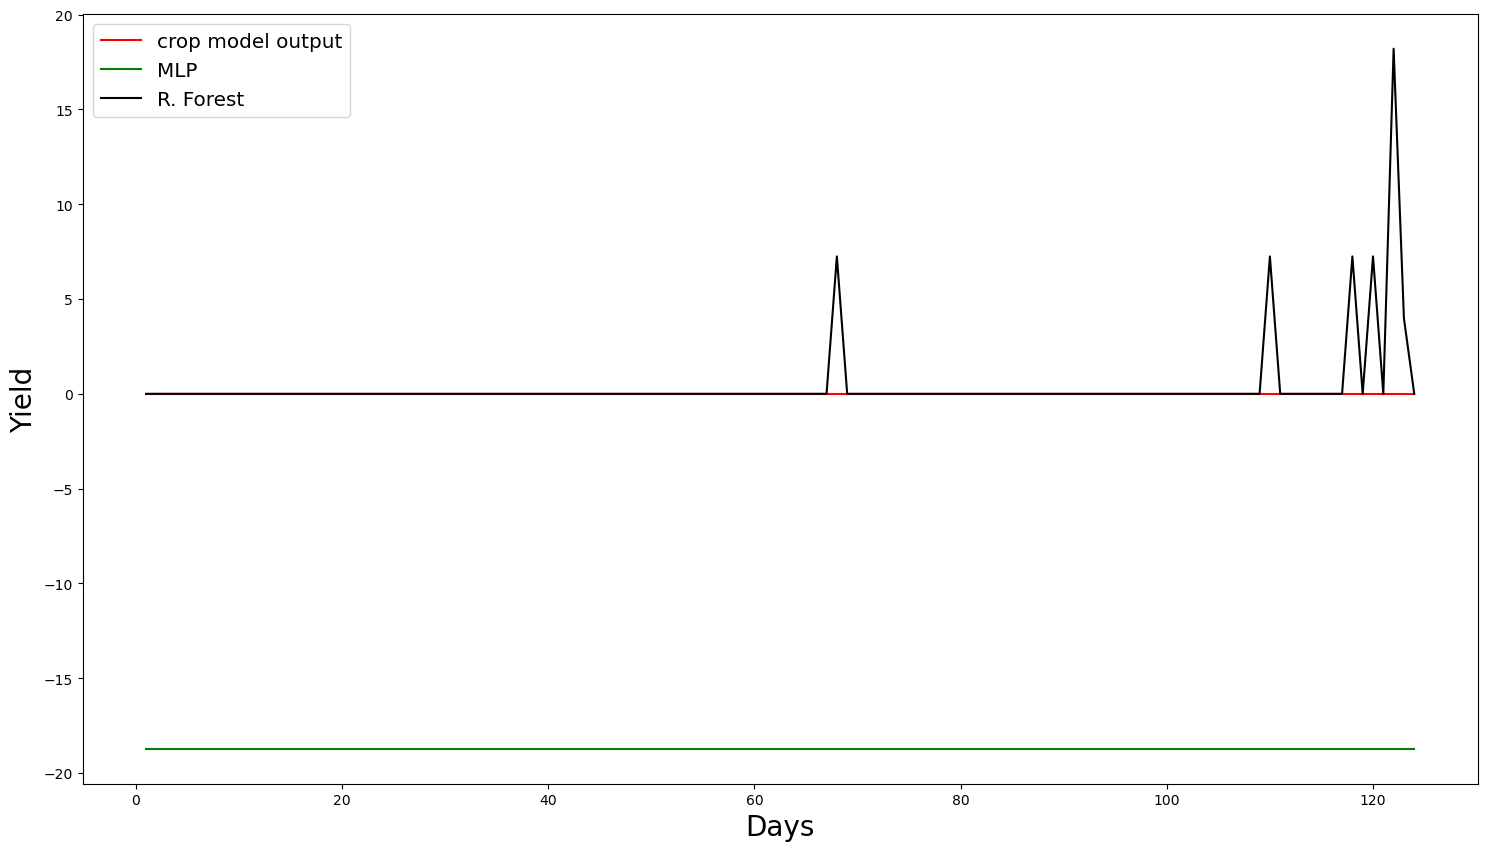

In [42]:
t_range = [i for i in range(1, 125)] 
plt.figure(figsize=(18, 10))
plt.plot(t_range, y_data[t_range], color='red', label="crop model output")
for name in predictions:
    inv_preds = y_scaler.inverse_transform(predictions[name].reshape((-1, 1))).reshape((1, -1))[0]
    plt.plot(t_range, inv_preds[t_range], color=colors[name], label=name)
plt.legend(fontsize="x-large")    
plt.xlabel('Days', fontsize=20)
plt.ylabel('Yield', fontsize=20)
plt.show

MSE   [0.1660113122441954, 0.3319002822251973]
RMSE   [0.40744485791846163, 0.5761078737746927]
RRMSE   [6.212311952053655, 8.78391703899959]
MAE   [0.28796052929779903, 0.4005127814452257]
R2   [-2.8606030921241072, -6.718361107529059]


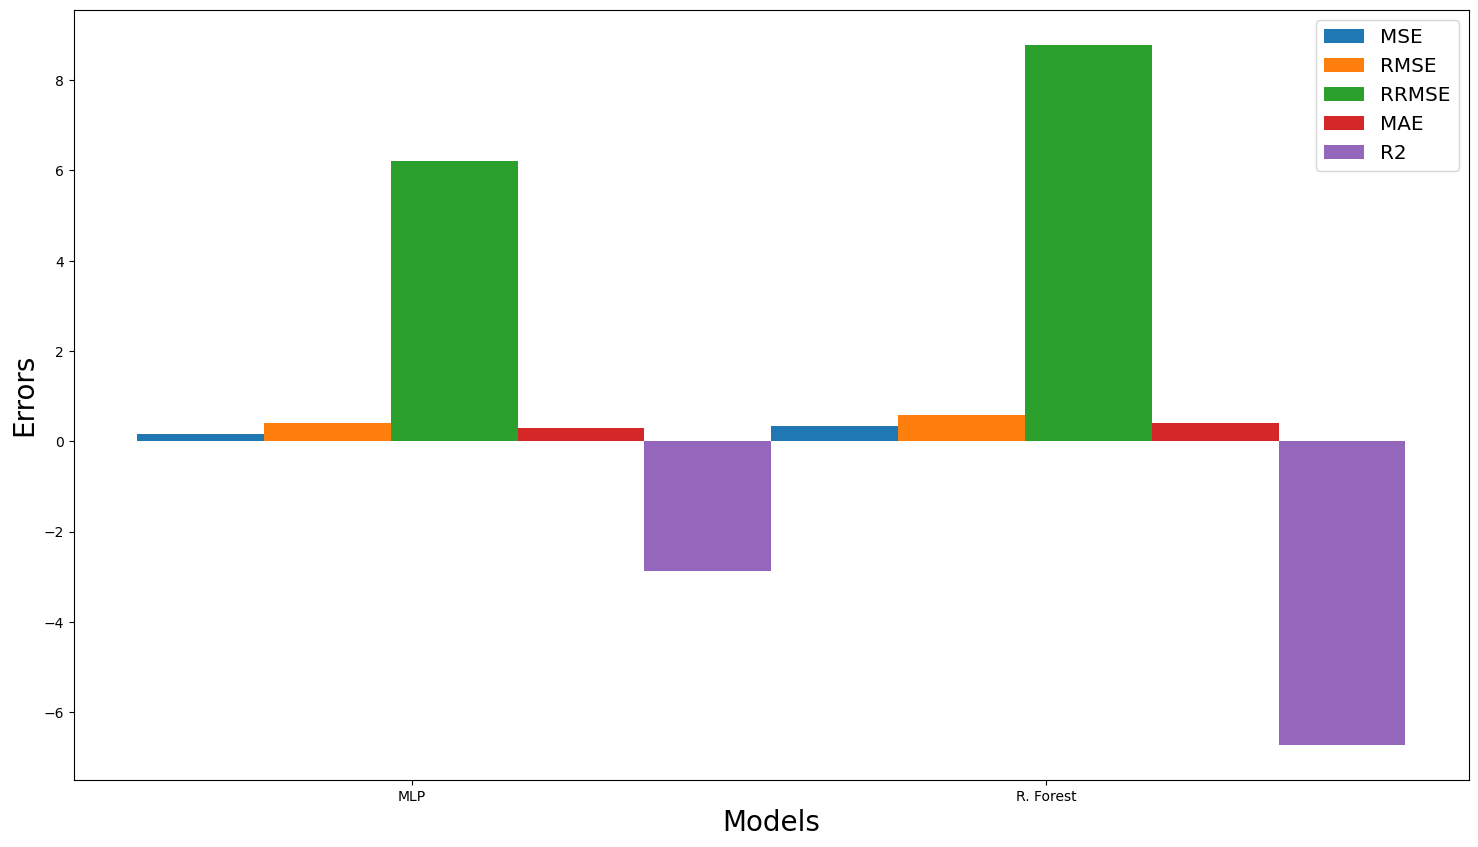

In [43]:
X_axis = np.arange(len(model_names))
plt.figure(figsize=(18, 10))
width = 0.2
r_width = 0
par = [par_mse, par_rmse, par_rrmse,par_mae, par_r2] 
for i, name in enumerate(performance_names):
    plt.bar(X_axis + r_width, par[i], width=width, label = name)
    print(name," ",par[i])
    r_width +=width
  
plt.xticks(X_axis+r_width/3, model_names)
plt.xlabel("Models", fontsize=20)
plt.ylabel("Errors", fontsize=20)
plt.legend(fontsize="x-large")
plt.show()